# **Exploratory Data Analysis**

## **Imports**

In [1]:
import torch
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import librosa
from src.utility import EDA

eda = EDA()

## **Importing Data**

Let's first import the data we will be working with. The `raw` data consists of the original samples of each instrument hit while the `clean` data has been preprocessed (we will look further into the details of the preprocessing techniques in a later section).

## **Raw Data**

In [2]:
raw_df = pd.read_csv('data/raw/_samples.csv', index_col=None)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   file      750 non-null    object 
 1   length    750 non-null    float64
 2   avg_db    750 non-null    float64
 3   class     750 non-null    object 
 4   class_id  750 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 29.4+ KB


### Class Distribution

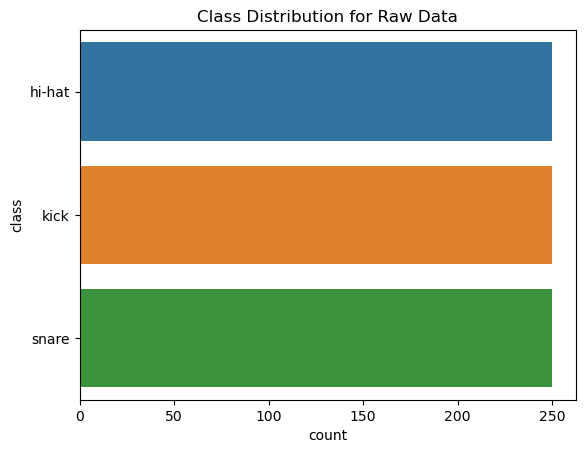

In [3]:
eda.plot_class_counts(raw_df, 'raw')

### Sample Lengths by Class

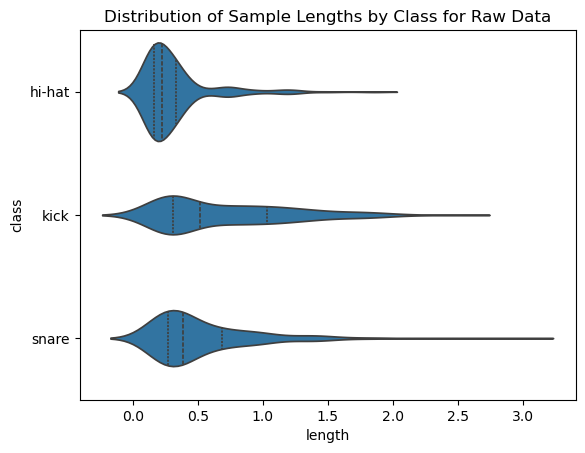

In [4]:
eda.plot_sample_len_dist(raw_df, 'raw')

## **Extracting Information from Samples**

### Audio Augmentations

#### _Spectrograms_

The following defines the transformation to extract a spectrogram from an audio signal.

In [5]:
raw_spectrogram = T.Spectrogram(n_fft=512)
clean_spectrogram = T.Spectrogram(n_fft=256, hop_length=32)

#### _Mel Spectrograms_

In [6]:
raw_mel_spec = T.MelSpectrogram(
    sample_rate = 41000,
    n_fft = 2048,
    hop_length = 2048 // 4,
    n_mels = 1028
)

clean_mel_spec = T.MelSpectrogram(
    sample_rate = 16000,
    n_fft = 256,
    hop_length = 256 // 8,
    n_mels = 256
)

/home/vikram-linux/anaconda3/envs/drum-tracker/lib/python3.12/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (1028) may be set too high. Or, the value for `n_freqs` (1025) may be set too low.
  warnings.warn(
/home/vikram-linux/anaconda3/envs/drum-tracker/lib/python3.12/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (256) may be set too high. Or, the value for `n_freqs` (129) may be set too low.
  warnings.warn(


#### _MFCCs_

The following defines the transformation to extracct MFCCs from an audio signal, give specific parameters.

In [7]:
raw_n_fft = 2048
# raw_hop_length = 512
raw_n_mels = 1028
raw_n_mfcc = 1028
raw_sample_rate = 44100

raw_mfcc_transform = T.MFCC(
    sample_rate = raw_sample_rate,
    n_mfcc = raw_n_mfcc,
    melkwargs={
        "n_fft": raw_n_fft,
        "n_mels": raw_n_mels,
        # "hop_length": raw_hop_length,
    },
)

In [8]:
clean_n_fft = 256
clean_hop_length = 8
clean_n_mels = 256
clean_n_mfcc = 256
clean_sample_rate = 16000

clean_mfcc_transform = T.MFCC(
    sample_rate = clean_sample_rate,
    n_mfcc = clean_n_mfcc,
    melkwargs={
        "n_fft": clean_n_fft,
        "n_mels": clean_n_mels,
        "hop_length": clean_hop_length,
    },
)

#### _Resampling_

The following is the transformation for downsampling an audio signal.

#### _Resampled MFCCs_

### Loop through Samples

In [9]:
raw_signals, raw_specs, raw_mel_specs, raw_mfccs = eda.extract_features(
    raw_df,
    raw_spectrogram,
    raw_mel_spec,
    raw_mfcc_transform
)

## **Plotting Extracted Data**

### Plotting Waveforms

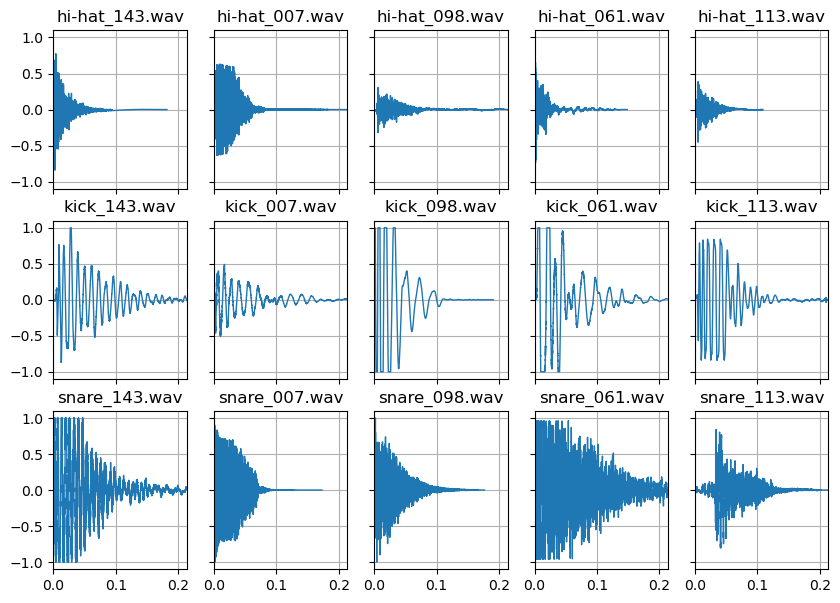

In [10]:
fig, axes = plt.subplots(3, 5, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (f_name, signal) in zip(axes, raw_signals.items()):
    eda.plot_waveform(signal, title=f_name, ax=ax)

### Plotting Spectrograms

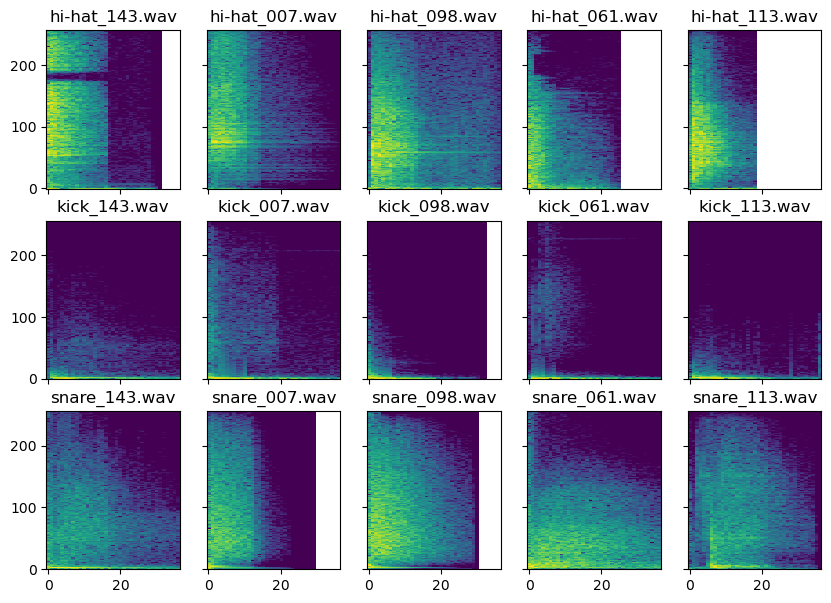

In [11]:
fig, axes = plt.subplots(3, 5, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (f_name, spec) in zip(axes, raw_specs.items()):
    eda.plot_spectrogram(spec, title=f_name, ax=ax)

### Plotting Mel Spectrograms

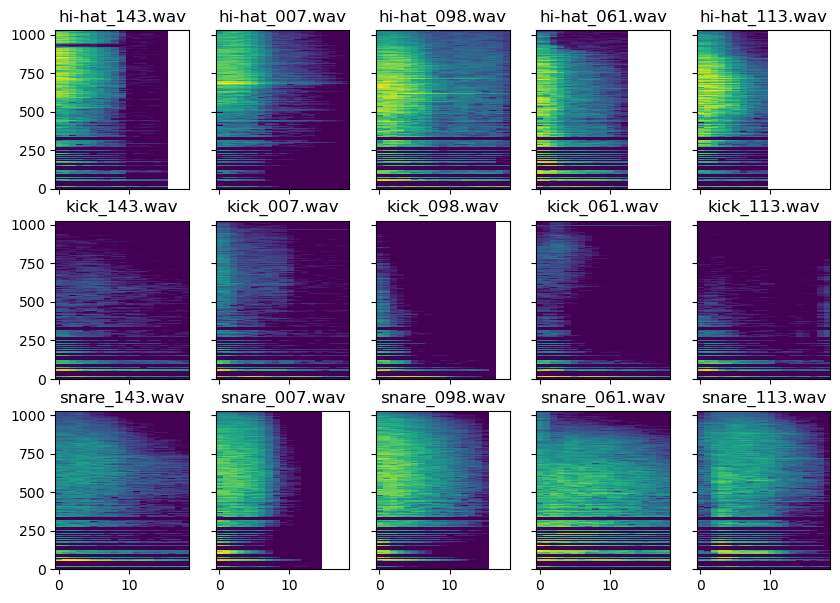

In [12]:
fig, axes = plt.subplots(3, 5, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (f_name, mel_spec) in zip(axes, raw_mel_specs.items()):
    eda.plot_spectrogram(mel_spec, title=f_name, ax=ax)

### Plotting MFCCs

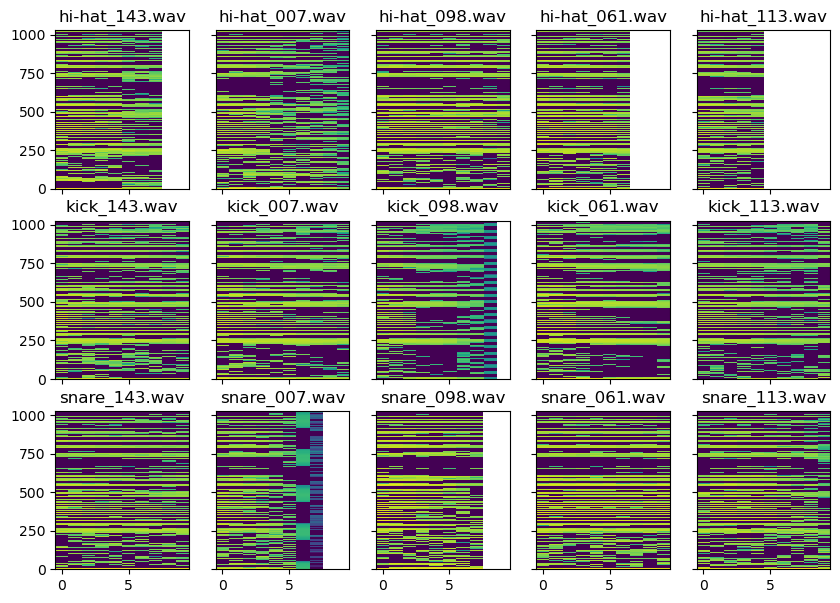

In [13]:
fig, axes = plt.subplots(3, 5, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (f_name, mfcc) in zip(axes, raw_mfccs.items()):
    eda.plot_spectrogram(mfcc[0], title=f_name, ax=ax)

## **Clean Data**

In [14]:
clean_df = pd.read_csv('data/clean/_samples.csv', index_col=None)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   file      16947 non-null  object 
 1   length    16947 non-null  float64
 2   avg_db    16947 non-null  float64
 3   class     16947 non-null  object 
 4   class_id  16947 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 662.1+ KB


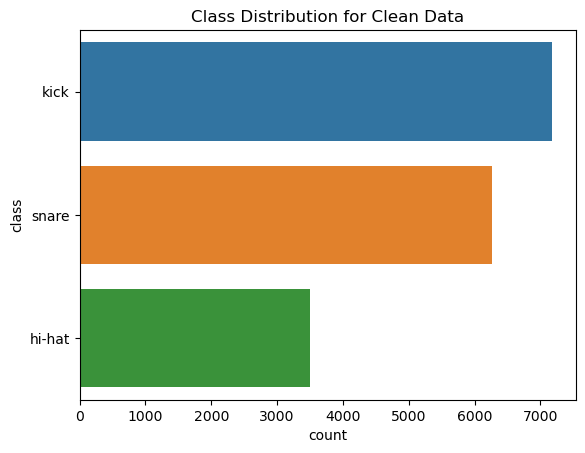

In [15]:
eda.plot_class_counts(clean_df, 'clean')

In [16]:
clean_signals, clean_specs, clean_mel_specs, clean_mfccs = eda.extract_features(
    clean_df,
    clean_spectrogram,
    clean_mel_spec,
    clean_mfcc_transform,
    data_type='clean'
)

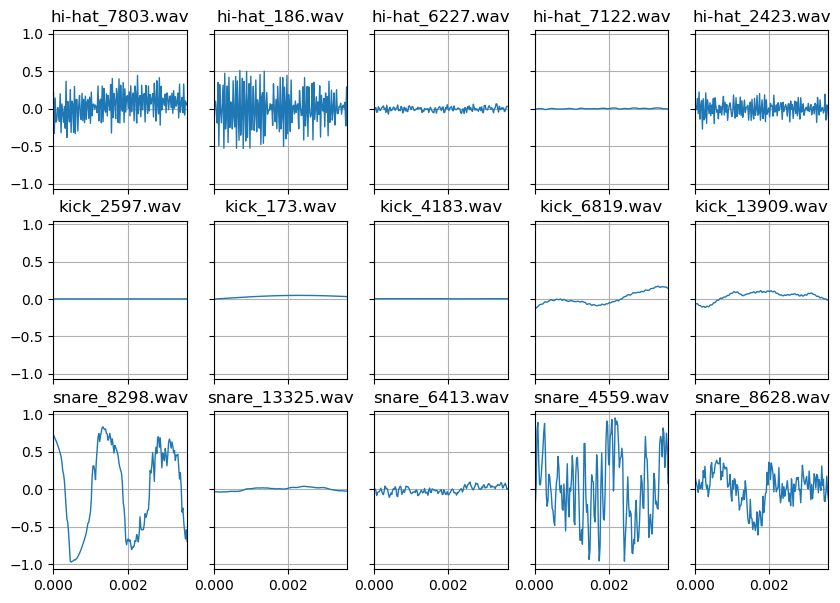

In [17]:
fig, axes = plt.subplots(3, 5, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (f_name, signal) in zip(axes, clean_signals.items()):
    eda.plot_waveform(signal, title=f_name, ax=ax)

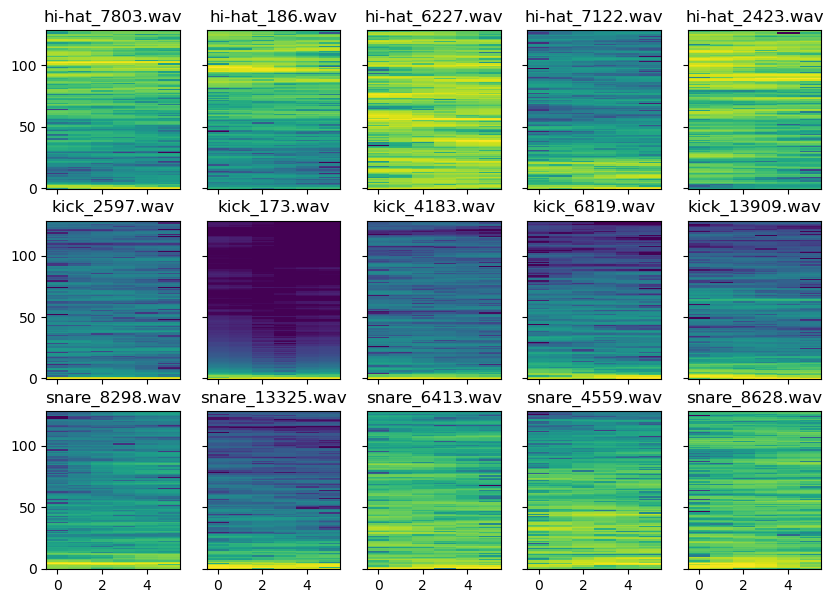

In [18]:
fig, axes = plt.subplots(3, 5, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (f_name, spec) in zip(axes, clean_specs.items()):
    eda.plot_spectrogram(spec, title=f_name, ax=ax)

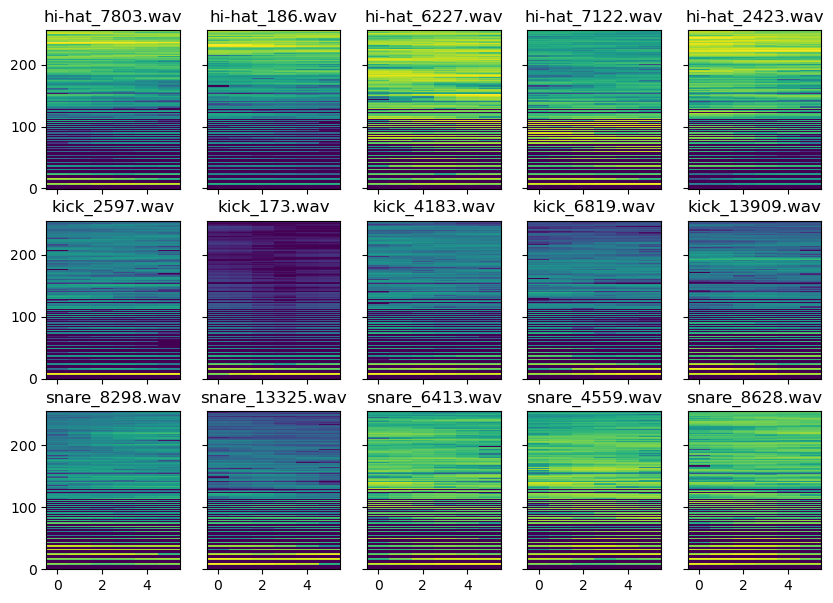

In [19]:
fig, axes = plt.subplots(3, 5, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (f_name, mel_spec) in zip(axes, clean_mel_specs.items()):
    eda.plot_spectrogram(mel_spec, title=f_name, ax=ax)

In [20]:
mel_spec.unsqueeze(0).size()

torch.Size([1, 256, 6])

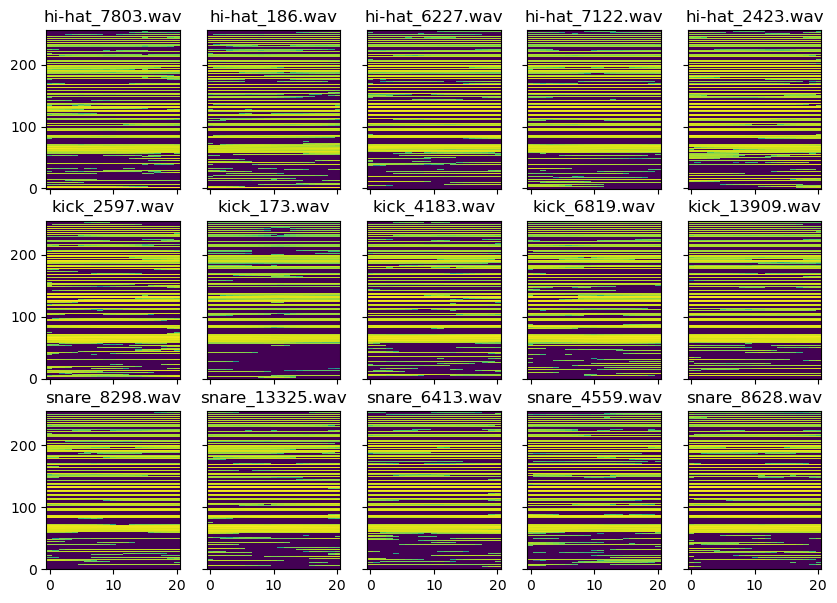

In [21]:
fig, axes = plt.subplots(3, 5, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (f_name, mfcc) in zip(axes, clean_mfccs.items()):
    eda.plot_spectrogram(mfcc.squeeze(0), title=f_name, ax=ax)